<a href="https://colab.research.google.com/github/Digitall-Ivan/Data_Analytics_course/blob/main/Ivan_Zakorchevnyi_Additional_hw_4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Додаткове завдання з pandas
Вітаю! В цьому завданні будемо працювати з даними з опитування щодо зарплат ІТ спеціалістів на рексурсі DOU від грудня 2022 року. Впевнена, це буде цікаве дослідження, а заразом і практика pandas :)
Цей аналіз може бути корисним людині, яка обирає напрям роботи в ІТ і хоче зрозуміти тенденції. За якісного виконання цього аналізу, цей проєкт можна сміливо додавати у Ваше портфоліо!

1. Зчитайте дані з файлу `2022_dec_raw.csv`. Увага! Тут необхідно використати аргумент `pd.read_csv` `sep=';'`, бо розділювач в даних - крапка з комою.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd

file_path = "/content/drive/MyDrive/I LOVE DATA EDU COURSE/RAWDATA/2022_dec_raw.csv"
df = pd.read_csv(file_path, sep=';')

2. Які колонки мають дані?

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Timestamp                                                                   13315 non-null  object
 1   Ви працюєте зараз в ІТ?                                                     13315 non-null  object
 2   Де ви зараз живете?                                                         13315 non-null  object
 3   В якій області ви зараз живете?                                             11538 non-null  object
 4   Зарплата у $$$ за місяць, лише ставка після сплати податків                 13288 non-null  object
 5   Ваша стать                                                                  13315 non-null  object
 6   Ваш вік                                               

3. Скільки рядків та колонок мають дані? Скільки пропущених значень має кожна з колонок?

In [6]:
# Рахую кількість рядків та колонок
rows, cols = df.shape
print(f"Кількість рядків: {rows}")
print(f"Кількість колонок: {cols}")

# Виводжу кількість пропущених значень у кожній колонці
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\nКількість пропущених значень у кожній колонці:")
print(missing_values)

# Рахую частку пропусків у відсотках
missing_percent = (df.isnull().mean() * 100).round(2)
print("\nВідсоток пропущених значень (%):")
print(missing_percent)

Кількість рядків: 13315
Кількість колонок: 28

Кількість пропущених значень у кожній колонці:
Ваша посада7                                                                  13199
Ваша спеціалізація                                                            13156
Ваша посада5                                                                  13027
Ваша посада                                                                   13010
Ваша посада6                                                                  12962
Ваша посада4                                                                  12830
Оберіть вашу спеціалізацію                                                    12829
Оберіть вашу посаду2                                                          12755
Ваша посада3                                                                  12494
Вкажіть вашу спеціалізацію                                                    10951
Чи використовуєте ви у своїй роботі мови програмування (одну чи де

4. Які колонки мають всі значення заповненими (не мають дожного None значення)? Виведіть програмно список цих колонок.

In [7]:
# Визначаю колонки без пропусків
full_columns = [col for col in df.columns if df[col].isnull().sum() == 0]

# Виводжу список таких колонок
print("Колонки без жодного пропущеного значення:")
print(full_columns)

Колонки без жодного пропущеного значення:
['Timestamp', 'Ви працюєте зараз в ІТ?', 'Де ви зараз живете? ', 'Ваша стать', 'Ваш вік', 'Яка у вас освіта?', 'Знання англійської мови', 'Оберіть вашу посаду', 'Ваш тайтл', 'В якій сфері працюєте?', 'Тип компанії', 'Загальний стаж роботи за спеціальністю']


5. Який тип мають колонки в наборі даних? Які з колонок типу object логічно на ваш погляд перетворити на числові колонки?

In [8]:
# Переглядаю типи даних
print(df.dtypes)


Timestamp                                                                     object
Ви працюєте зараз в ІТ?                                                       object
Де ви зараз живете?                                                           object
В якій області ви зараз живете?                                               object
Зарплата у $$$ за місяць, лише ставка після сплати податків                   object
Ваша стать                                                                    object
Ваш вік                                                                       object
Яка у вас освіта?                                                             object
Чи є у вас науковий ступінь?                                                  object
Знання англійської мови                                                       object
Оберіть вашу посаду                                                           object
Ваш тайтл                                                        

На мій погляд - такі колонки, які логічно мають бути числовими (int або float):

Колонка "Зарплата у $$$ за місяць, лише ставка після сплати податків"	Це головний показник зарплати, числовий. Може бути float.
Далі "Ваш вік"	Це вік респондента - має бути числовий (int).
Також "Загальний стаж роботи за спеціальністю"	Це кількість років досвіду - числовий (int або float).

6. Трансформуйте колонки 'Ваш вік', 'Зарплата у $$$ за місяць, лише ставка після сплати податків' у тип даних float. УВАГА! Перед трансформацією подивіться, які дані містять ці колонки. Аби успішно трансформувати тип даних, треба спочатку привести рядки до того виду, який буде підходити, аби потім рядок зробити типом float.

In [9]:
# Перелік колонок, які перетворюю
cols_to_convert = [
    "Зарплата у $$$ за місяць, лише ставка після сплати податків",
    "Ваш вік",
    "Загальний стаж роботи за спеціальністю"
]

# Перетворюю у необхідний тип даних
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Перевіряю нові типи
print(df[cols_to_convert].dtypes)


Зарплата у $$$ за місяць, лише ставка після сплати податків    float64
Ваш вік                                                        float64
Загальний стаж роботи за спеціальністю                         float64
dtype: object


7. Це завдання з зірочкою! Нам треба транфсформувати колонку Timestamp у тип даних `datetime64[ns]`. Це не так просто як здається на першйий погляд :) Але це реальна ситуація, яка може трапитись при зборі даних в роботі аналітиком.
Я запропоную один зі способів виконати завдання, але ви можете написати по-своєму. Головне - отримати колонку - потрібного типу.
Пропоную наступний алгоритм дій:
    1. Подивитись, які дані містяться в цій колонці. Виведіть перші і останні 5 записів. Чи однаковий формат цих даних? (спойлер: ні, бо інакше все було б просто :))
    2. Нам треба враховуючи різний формат даних перетворити рядок у колонці `Timestamp` на тип `datetime64[ns]`. Як це зробити? Для перетворення рядка на `datetime64` пропоную скористатись `datetime.datetime.strptime`.
    Для цього треба імпортувати бібліотеку `datetime`. Я пропоную написати функцію для обробки кожного окремого рядка, яка враховує довжину рядка і на основі цього застосовує різний формат даних дати.
    Як прописувати формат даних можна переглянути [тут](https://www.w3schools.com/python/python_datetime.asp).
    3. Коли функція для обробки кожного окремого рядка готова, застосуйте її для всіх даних з допомогою методу `apply`.

In [23]:
# Перегляну перші і останні 5 записів для розуміння даних в колонках
print(df['Timestamp'].head())
print(df['Timestamp'].tail())

0   2022-11-30 10:26:37
1   2022-11-30 10:26:39
2   2022-11-30 10:26:58
3   2022-11-30 10:27:31
4   2022-11-30 10:27:34
Name: Timestamp, dtype: datetime64[ns]
13310   NaT
13311   NaT
13312   NaT
13313   NaT
13314   NaT
Name: Timestamp, dtype: datetime64[ns]


In [24]:
from datetime import datetime

# конвертую колонку Timestamp
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%m.%d.%Y %H:%M:%S", errors="coerce")

# перевіряю результат перетворення
print(df["Timestamp"].head())
print(df["Timestamp"].dtypes)


0   2022-11-30 10:26:37
1   2022-11-30 10:26:39
2   2022-11-30 10:26:58
3   2022-11-30 10:27:31
4   2022-11-30 10:27:34
Name: Timestamp, dtype: datetime64[ns]
datetime64[ns]


In [25]:
print(df['Timestamp'].tail())

13310   NaT
13311   NaT
13312   NaT
13313   NaT
13314   NaT
Name: Timestamp, dtype: datetime64[ns]


In [26]:
df.loc[df['Timestamp'].isna(), 'Timestamp'].head(10)


,Timestamp
2272,NaT
2273,NaT
2274,NaT
2275,NaT
2276,NaT
2277,NaT
2278,NaT
2279,NaT
2280,NaT
2281,NaT


In [28]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', format='%m.%d.%Y %H:%M:%S')



In [29]:
print(df['Timestamp'].head())
print(df['Timestamp'].tail())

0   2022-11-30 10:26:37
1   2022-11-30 10:26:39
2   2022-11-30 10:26:58
3   2022-11-30 10:27:31
4   2022-11-30 10:27:34
Name: Timestamp, dtype: datetime64[ns]
13310   NaT
13311   NaT
13312   NaT
13313   NaT
13314   NaT
Name: Timestamp, dtype: datetime64[ns]


8. Для колонок типу даних object (які такими лишились після всіх наших трансформацій) виведіть кількість унікальних значень.

In [30]:
# Обрав лише колонки типу object
object_cols = df.select_dtypes(include='object').columns

# для кожної такої колонки вивів кількість унікальних значень
unique_counts = {col: df[col].nunique() for col in object_cols}

# показую результат
unique_counts


{'Ви працюєте зараз в ІТ?': 5,
 'Де ви зараз живете? ': 2,
 'В якій області ви зараз живете?': 23,
 'Зарплата у $$$ за місяць, лише ставка після сплати податків': 896,
 'Ваша стать': 2,
 'Ваш вік': 47,
 'Яка у вас освіта?': 5,
 'Чи є у вас науковий ступінь? ': 3,
 'Знання англійської мови': 5,
 'Оберіть вашу посаду': 22,
 'Ваш тайтл': 10,
 'Ваша спеціалізація': 8,
 'Вкажіть вашу спеціалізацію': 4,
 'Оберіть вашу спеціалізацію': 21,
 'Ваша посада': 15,
 'Оберіть вашу посаду2': 7,
 'Ваша посада3': 7,
 'Ваша посада4': 5,
 'Ваша посада5': 6,
 'Ваша посада6': 2,
 'Ваша посада7': 4,
 'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?': 2,
 'Основна мова програмування': 33,
 'Вкажіть вашу основну спеціалізацію': 12,
 'В якій сфері працюєте?': 1768,
 'Тип компанії': 6,
 'Загальний стаж роботи за спеціальністю': 19}

9. Для колонок типу даних object виведіть топ 10 найбільш частих значень з кількістю рядків, в яких це значення зустрічається. Зробіть це для кожної колонки окремо. Наприклад, в циклі.  
Що цікавого бачите? Які висновки можна зробити? Що особисто Вас вразило?

In [31]:
# вибираю лише колонки типу object
object_cols = df.select_dtypes(include='object').columns

# проходжу по кожній колонці
for col in object_cols:
    print(f"--- Колонка: {col} ---")
    # виводжу топ-10 найбільш частих значень з кількістю рядків
    print(df[col].value_counts().head(10))
    print("\n")


--- Колонка: Ви працюєте зараз в ІТ? ---
Ви працюєте зараз в ІТ?
Так, працюю full-time      12643
Ні, тимчасово не працюю      380
Так, працюю part-time        152
Так, я фрилансер             115
Інше                          25
Name: count, dtype: int64


--- Колонка: Де ви зараз живете?  ---
Де ви зараз живете? 
В Україні                                                      11587
За кордоном (переїхали через війну, але планую повернутися)     1728
Name: count, dtype: int64


--- Колонка: В якій області ви зараз живете? ---
В якій області ви зараз живете?
Київ чи область                4411
Львів чи область               2353
Дніпро чи область               751
Івано-Франківськ чи область     478
Вінниця чи область              447
Одеса чи область                443
Харків чи область               355
Полтава чи область              252
Черкаси чи область              232
Хмельницький чи область         230
Name: count, dtype: int64


--- Колонка: Зарплата у $$$ за місяць, лише став

Справило враження: велика концентрація молодих спеціалістів у великих містах, велика розбіжність у зарплатах, навіть серед тих же посад, дуже різноманітні назви посад, що ускладнює аналіз, навіть якщо посади однакові по функціоналу.
Переважна більшість працює full-time (12643 респондентів), поєднання частково-фриланс/part-time значно менше. Тобто, більшість ІТ-фахівців в Україні працюють стабільно повний робочий день.
Більшість в Україні, незважаючи на війну (11587), близько 1700 за кордоном. По областях найбільше ІТ-спеціалістів у Києві та Львові.
Найпоширеніші зарплати: 3000$ (561 респондент), 2000$ (468).
Є високі зарплати 5000-6000$, але їх менше, що свідчить про широку розбіжність у доходах.
Чоловіки домінують: 10221 проти 3094 жінок. Вік в районі 25–30 років, тобто основна маса - молоді спеціалісти.

10. Виведіть медіанну (медіана - це значення, менше якого є рівно 50% вибірки і більше якого є теж рівно 50% вибірки)
ЗП (Зарплата у $$$) для кожного рівня знання англійської. Які висновки можна зробити?

In [33]:
# Перетворюю колонку в числовий тип для початку
df['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = pd.to_numeric(
    df['Зарплата у $$$ за місяць, лише ставка після сплати податків'], errors='coerce'
)

# Тепер обчислюю медіану по групах знання англійської
median_salary_by_english = df.groupby('Знання англійської мови')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median()

print(median_salary_by_english)


Знання англійської мови
Advanced              3500.0
Elementary            1155.0
Intermediate          2125.0
Pre-Intermediate      1408.0
Upper-Intermediate    3300.0
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64


Залежність від рівня англійської очевидна - профі з Advanced та Upper-Intermediate мають найвищу медіанну зарплату (3500–3300 $)

Високий рівень англійської явно корелює із зарплатою, що логічно для ІТ-галузі, де багато вакансій потребують спілкування з міжнародними командами або клієнтами.

Очевидно, що якщо плануєш кар’єру в ІТ та прагнеш вищої зарплати, поліпшення англійської бути мати прямий фінансовий ефект.

11. Є така штука як сортування значень категоріальної змінної. Нам це зараз стане в нагоді, адже рівні англійської можна посортувати.
Давайте відсотруємо рівні англ. і тайтли. Просто запустіть код нижче і проаналізуйте, що він робить.

In [34]:
df['Знання англійської мови'] = pd.Categorical(df['Знання англійської мови'],
                      categories=['Elementary','Pre-Intermediate','Intermediate','Upper-Intermediate','Advanced'],
                      ordered=True)

df['Ваш тайтл'] = pd.Categorical(df['Ваш тайтл'],
                      categories=['Intern/Trainee', 'Junior', 'Немає тайтлу', 'Middle', 'Senior', 'Tech Lead', 'Team Lead', 'Architect', 'Head', 'Manager'],
                      ordered=True)

Колонка Знання англійської мови перетворюється на категоріальну змінну з певним порядком, заданим у categories. Тепер рівні англійської мають чіткий логічний порядок: Elementary < Pre-Intermediate < Intermediate < Upper-Intermediate < Advanced

12. Зробіть зводну таблицю, де стовпці - це 'Ваш тайтл', рядки - 'Знання англійської мови', а значення - медіанна ЗП. Які висновки можна зробити?
Тут ще для зручності можна зробити градієнтне забарвлення і відформатувати значення для легшого перегляду.

In [35]:
import pandas as pd

# Створюю зведену таблицю
pivot_salary = pd.pivot_table(
    df,
    index='Знання англійської мови',
    columns='Ваш тайтл',
    values='Зарплата у $$$ за місяць, лише ставка після сплати податків',
    aggfunc='median'
)

# Даю візуалізацію з градієнтом
pivot_salary.style.background_gradient(cmap='YlGnBu').format("{:,.0f}")


/tmp/ipython-input-3035242464.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_salary = pd.pivot_table(


Ваш тайтл,Intern/Trainee,Junior,Немає тайтлу,Middle,Senior,Tech Lead,Team Lead,Architect,Head,Manager
Знання англійської мови,,,,,,,,,,
Elementary,500,600,550,"1,500","2,500","5,000","2,100",nan,"1,500","1,120"
Pre-Intermediate,400,800,934,"1,825","3,500","4,000","2,850","2,900","2,400","1,225"
Intermediate,400,900,"1,300","2,200","4,100","5,000","3,800","5,450","3,500","2,100"
Upper-Intermediate,485,"1,000","1,600","2,500","4,750","5,650","4,655","6,400","4,000","3,600"
Advanced,500,"1,000","2,075","2,500","4,750","6,000","5,000","7,000","5,000","4,000"


Чим вищий рівень англійської, тим більша медіанна зарплата для більшості тайтлів. Middle чи Senior з Advanced англійською  отримують значно більше, ніж ті ж тайтли з Intermediate.

13. Виведіть результат методу describe() по колонцы розміру ЗП для топ 5 за частотою зустрічання в даних областей (В якій області ви зараз живете?). Зробіть висновки, де вигідніше жити з точки зору ЗП і чи суттєва різниця на Ваш погляд для прийняття рішення про переїзд?

In [36]:

# Виводжу Топ-5 областей за частотою
top5_regions = df['В якій області ви зараз живете?'].value_counts().head(5).index.tolist()
print("Топ-5 областей за частотою респондентів:", top5_regions)

# describe по ЗП для кожної з топ-5 областей
for region in top5_regions:
    print(f"\n--- Область: {region} ---")
    print(df.loc[df['В якій області ви зараз живете?'] == region,
                 'Зарплата у $$$ за місяць, лише ставка після сплати податків'].describe())


Топ-5 областей за частотою респондентів: ['Київ чи область', 'Львів чи область', 'Дніпро чи область', 'Івано-Франківськ чи область', 'Вінниця чи область']

--- Область: Київ чи область ---
count     4409.000000
mean      3142.334997
std       2039.949490
min         80.000000
25%       1500.000000
50%       2800.000000
75%       4500.000000
max      16000.000000
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

--- Область: Львів чи область ---
count     2351.000000
mean      3122.163760
std       2103.362239
min        150.000000
25%       1375.000000
50%       2700.000000
75%       4500.000000
max      14000.000000
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

--- Область: Дніпро чи область ---
count      751.000000
mean      2582.584554
std       1864.711284
min        100.000000
25%       1025.000000
50%       2000.000000
75%       3600.000000
max      12000.000000
Name: Зарплата у $$$ за місяць, лише ставка післ

Якщо головний критерій - зарплата, то Київ та Львів - топові вибори.
Якщо враховувати баланс ЗП та витрат на життя, варто детальніше порівнювати регіони, можливо Вінниця або Івано-Франківськ будуть більш комфортними при помірних зарплатах.

14. Як зростає зарплата з роками? Для цього нам треба відформатувати колонку "Загальний стаж роботи за спеціальністю" аналогічно до того, як ми це робили для колонки 'Знання англійської мови' і потім вивести медіанні значення для кількості років стажу.

In [38]:
import pandas as pd

# Створюю порядок для категоріальної змінної
experience_order = [
    "1 рік",
    "1,5 року",
    "2 роки",
    "3 роки",
    "4 роки",
    "5 років",
    "6 років",
    "7 років",
    "10 років",
    "15 і більше років"
]

# Перетворюю колонку на категоріальний тип з порядком
df['Загальний стаж роботи за спеціальністю'] = pd.Categorical(
    df['Загальний стаж роботи за спеціальністю'],
    categories=experience_order,
    ordered=True
)

# Перетворюю зарплату на числовий формат
df['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = pd.to_numeric(
    df['Зарплата у $$$ за місяць, лише ставка після сплати податків'], errors='coerce'
)

# Групую за стажем та обчислюємо медіану зарплати
median_salary_by_experience = df.groupby('Загальний стаж роботи за спеціальністю')[
    'Зарплата у $$$ за місяць, лише ставка після сплати податків'
].median()

print(median_salary_by_experience)



Загальний стаж роботи за спеціальністю
1 рік                 950.0
1,5 року             1200.0
2 роки               1700.0
3 роки               2450.0
4 роки               3000.0
5 років              3500.0
6 років              4000.0
7 років              4250.0
10 років             4600.0
15 і більше років    4500.0
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64


/tmp/ipython-input-3343658299.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_by_experience = df.groupby('Загальний стаж роботи за спеціальністю')[


Основне зростання зарплати відбувається у перші 5–10 років.

Для прийняття рішення про переїзд або зміну роботи враховувати стаж важливо: топові спеціалісти мають стабільно високі доходи, а новачки - суттєво нижчі. Цікаво, що для 15+ років медіанна зарплата трохи нижча, ніж у 10 років (4500 $), можливо через меншу вибірку або кар’єрні зміни (наприклад, перехід у менеджмент, фріланс тощо).

Далі тут можна зробити багато аналогічних агрегацій, проаналізувати, в який час люди заповнювали форму, хто більше отримує, Business Analyst, чи Data Analyst. Я вас заохочувати не стримувати свій інтерес і покапати ці дані далі :)

Вирішив вияснити хто більше заробляє Business Analyst, чи Data Analyst?

In [39]:
# Фільтрую по посаді
ba_salaries = df[df['Ваша посада4'] == 'Business Analyst']['Зарплата у $$$ за місяць, лише ставка після сплати податків']
da_salaries = df[df['Ваша посада4'] == 'Data Analyst']['Зарплата у $$$ за місяць, лише ставка після сплати податків']

# Обчислюю середнє та медіану
comparison = pd.DataFrame({
    'Середнє ЗП': [ba_salaries.mean(), da_salaries.mean()],
    'Медіана ЗП': [ba_salaries.median(), da_salaries.median()]
}, index=['Business Analyst', 'Data Analyst'])

print(comparison)


                   Середнє ЗП  Медіана ЗП
Business Analyst  2510.325260      2250.0
Data Analyst      1770.660377      1500.0


Business Analyst в середньому отримує значно більше ніж Data Analyst. Але треба з чогось починати в ІТ

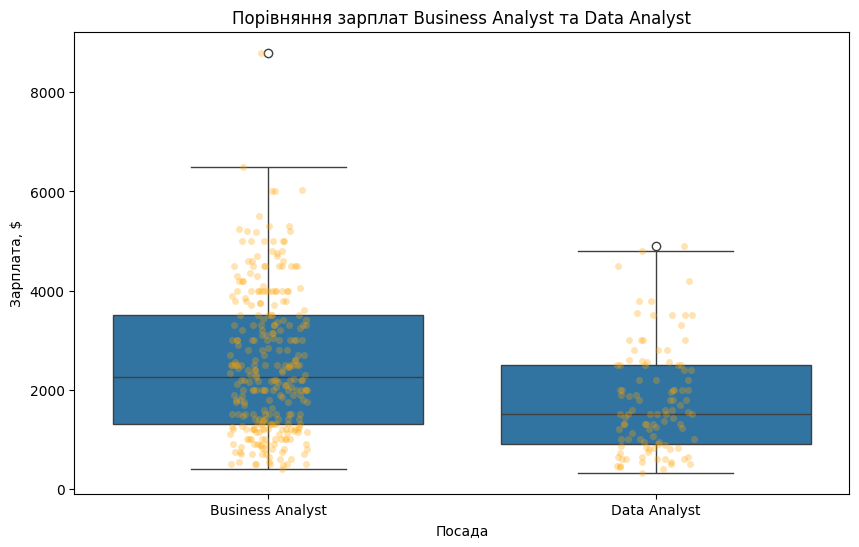

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Вибираю потрібні рядки з DataFrame
analysts_df = df[df['Ваша посада4'].isin(['Business Analyst', 'Data Analyst'])]

# Малюю графік розподілу зарплат
plt.figure(figsize=(10,6))
sns.boxplot(x='Ваша посада4', y='Зарплата у $$$ за місяць, лише ставка після сплати податків', data=analysts_df)
sns.stripplot(x='Ваша посада4', y='Зарплата у $$$ за місяць, лише ставка після сплати податків', data=analysts_df,
              color='orange', alpha=0.3, jitter=True)

plt.title('Порівняння зарплат Business Analyst та Data Analyst')
plt.ylabel('Зарплата, $')
plt.xlabel('Посада')
plt.show()


Тішить, що є аналітики даних з зарплатами понад 4000$ - буду до цього рівня тягнутися!